### 04650 Mathematical Foundations of Machine Learning 
******************************************************
#### AndrewID: spiwan

### Question 7

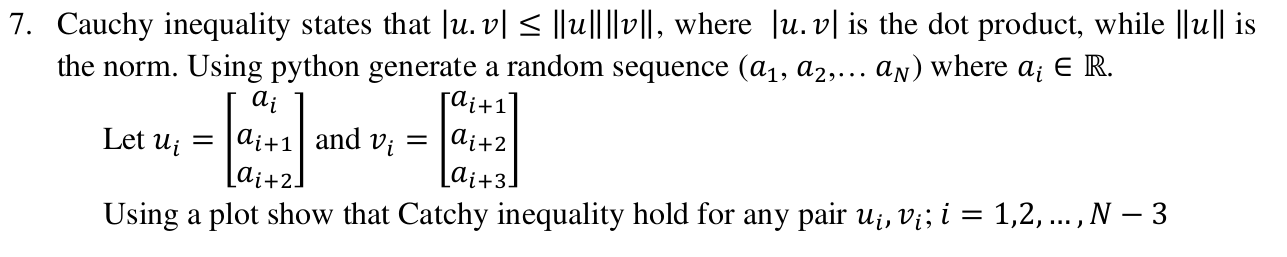

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt

In [2]:
#Initialize a variable for the number of random numbers to generate
N = 100
#Generate a list of N random numbers with values between 1 and 100
random_list = np.random.randint(1, 100, N)

In [3]:
#Initialize lists to hold the computed values
dot_product_list = []
norm_list = []
num_list = []
i = 0
#Loop through the list to create vectors u and v
#Find their dot product and norm and append to the lists above
while(i < len(random_list)-3):
    vector_u = np.array([random_list[i],random_list[i+1],random_list[i+2]])
    vector_v = np.array([random_list[i+1],random_list[i+2],random_list[i+3]])
    dot_product_list.append(vector_u.dot(vector_v))
    norm_list.append(norm(vector_u,1) * norm(vector_v,1))
    num_list.append(i)
    i+=1

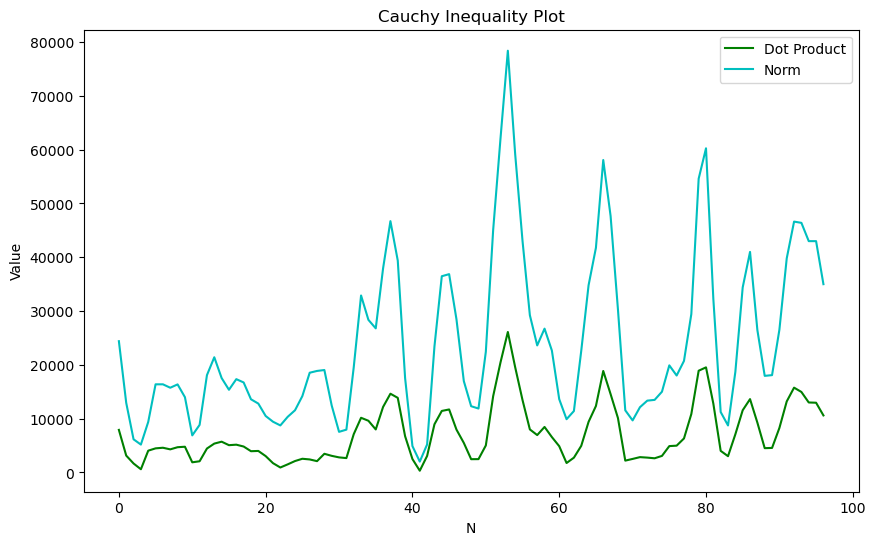

In [4]:
plt.figure(figsize=(10,6))
plt.title("Cauchy Inequality Plot")
plt.xlabel("N")
plt.ylabel("Value")
plt.plot(num_list,dot_product_list, c="g",label="Dot Product")
plt.plot(num_list,norm_list,c="c",label="Norm")
plt.legend()
plt.show()

###  Question 8

In linear regression, SVD can help by decomposing the design matrix, identifying dependencies between predictor variables, and enabling regularization techniques like ridge regression. By reducing the rank or eliminating singular values, SVD assists in stabilizing regression models and improving their predictive accuracy. In this question you will solve a regressional problem using SVD

In [5]:
from turtle import color
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
import pandas as pd

class LinearRegressorSVD():
    def __init__(self, A, b):
        ## Remember the equation Ax = b, where A is input data, our goal is to solve for the coeficients x
        y = np.array(b)
        self.A = A
        self.y = y
        # Setting an initial value for the coefficients matrix
        self.coefficients = np.empty((A.shape[1]))
        
    def train(self):
        "Computes the coefficients based on the dataset received by the model"

        #Train the model based on the data passed using SVD 
        U,S,Vt = np.linalg.svd(self.A, full_matrices=False)
        
        self.coefficients = Vt.T @ np.linalg.inv(np.diag(S)) @ U.T @ self.y
        
        return self.coefficients

    def predict(self, input):
        "Returns a prediction based on the learnt model and using the parameter passed"

        return input @ self.coefficients 

    def getError(self, y, prediction_set):
        # compute and return the mean squared error of predicted inputs and actual label
        # compute train and test MSE
        print(np.mean((prediction_set - y)**2))
        return
    
if __name__ == '__main__':

    dataset = pd.read_csv('housing.csv', header=None)

    # In our dataset, the last column represent the y value that we are looking for.
    # Separate the X from the y

    X = dataset[[0,1,2]].to_numpy()
    y = dataset[3].to_numpy()

    # Data processing.
    # By analyzing the dataset, we realize that our y values are in the order of 100,000. This can lead to numerical instability
    # so we first scale it. Note that our model will predict result that we will need to scale back in reallife.
    y =  y/100000

    # Looking at the values in the features as well, their multiplication can also lead to numerical instability.
    # In this case, we will apply what is called a min-max normalization. Read about it here https://en.wikipedia.org/wiki/Feature_scaling#Rescaling_(min-max_normalization)

    #Apply min-max normalization on each of the columns of the X array
    #Re-assign X to the normalized version of X
    
    minimum_x_value = X.min(axis=0)
    maximum_x_value = X.max(axis=0)
    
    X = (X - minimum_x_value) / (maximum_x_value - minimum_x_value)
    
    # In real-life training a model requires a training and testing dataset.
    # In this stage, we will randomly generate the two datasets using 80% for the training dataset
    # and 20% for the testing dataset. We use the train_test_split function for this

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

    # Now that we have our datasets ready, we can start with the training process
    lr = LinearRegressorSVD(X_train, y_train)
    lr.train()

    # Now we can test our model
    # Make a prediction using the test dataset
    # Your code goes here
    training_predictions = lr.predict(X_train)
    testing_predictions = lr.predict(X_test)
    
    ##Print the mean square error for both training data
    print("Training error:")
    lr.getError(training_predictions,y_train)
    print("Testing error:")
    lr.getError(testing_predictions,y_test)
    
    # Visualization
    
    #Create three plots. Using the test dataset, do a scatter plot of the i-th feature (X_i) against the true value y.

Training error:
1.1849172161729788
Testing error:
1.0273950755406083


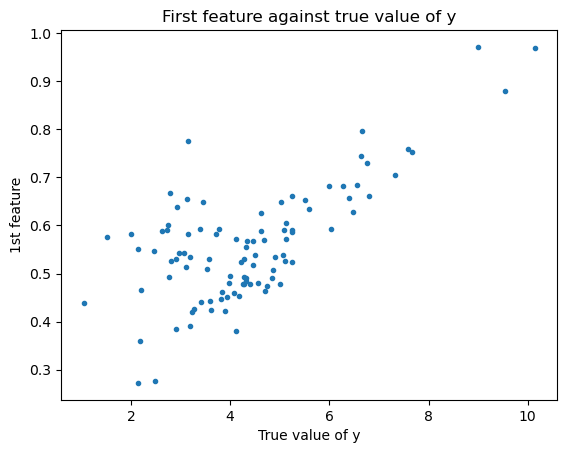

In [6]:
#Plot for feature 1 of test dataset
plt.title("First feature against true value of y")
plt.ylabel("1st feature")
plt.xlabel("True value of y")
plt.scatter(y_test,X_test[:, 0], marker='.')
plt.show()

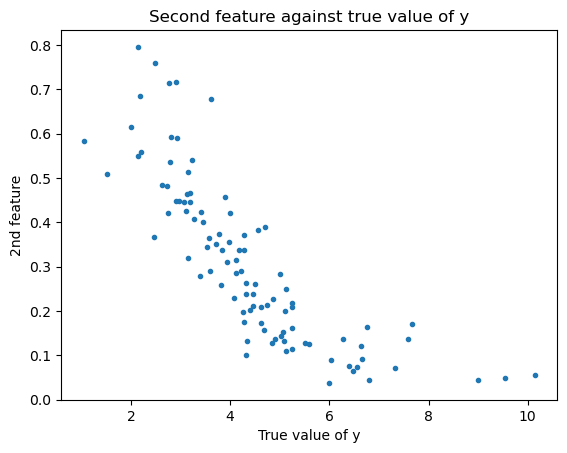

In [7]:
    
#Plot for feature 2 of test dataset
plt.title("Second feature against true value of y")
plt.ylabel("2nd feature")
plt.xlabel("True value of y")
plt.scatter(y_test,X_test[:, 1], marker='.')
plt.show()

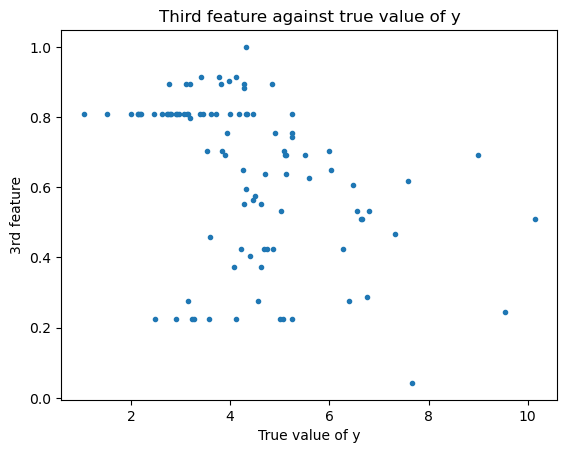

In [8]:
 #Plot for feature 3 of test dataset
plt.title("Third feature against true value of y")
plt.ylabel("3rd feature")
plt.xlabel("True value of y")
plt.scatter(y_test,X_test[:, 2], marker='.')
plt.show()

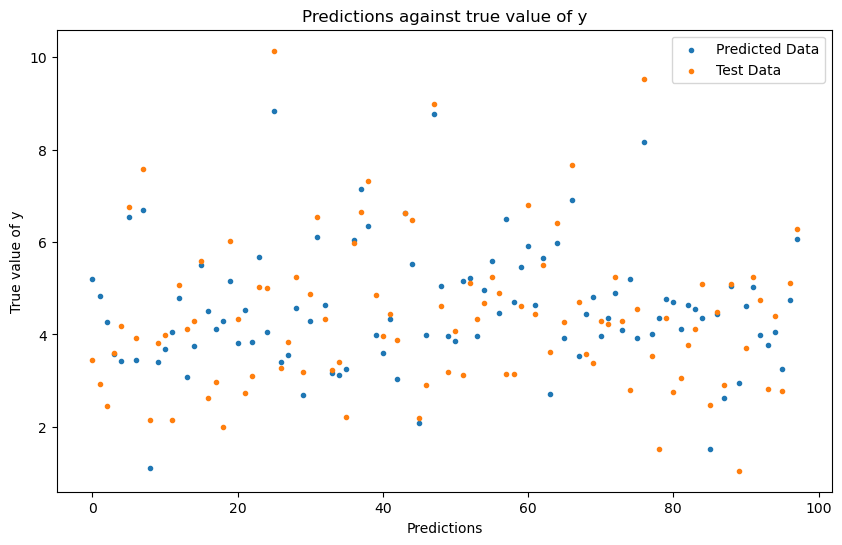

In [9]:
  #Plot for the predictions
plt.figure(figsize=(10,6))
plt.title("Predictions against true value of y")
plt.xlabel("Predictions")
plt.ylabel("True value of y")
plt.scatter(range(0,testing_predictions.size),testing_predictions, marker='.', label="Predicted Data")
plt.scatter(range(0,y_test.size),y_test, marker='.', label="Test Data")
plt.legend()
plt.show()